In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [4]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


We will look at the runs each team have scored in all this season.

In [14]:
dataset = pd.merge(matches, deliveries, left_on = "id",right_on = "match_id")
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Now we will just take the columns which we require.

In [16]:
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
column = ['id','season','batting_team','bowling_team','total_runs']
data = dataset[column]
data.head()

,id,season,batting_team,bowling_team,total_runs
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,0
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,0
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,4
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,0
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,2


In [51]:
runs_season = pd.DataFrame(data.groupby(['season']).sum()['total_runs'])
runs_season

,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


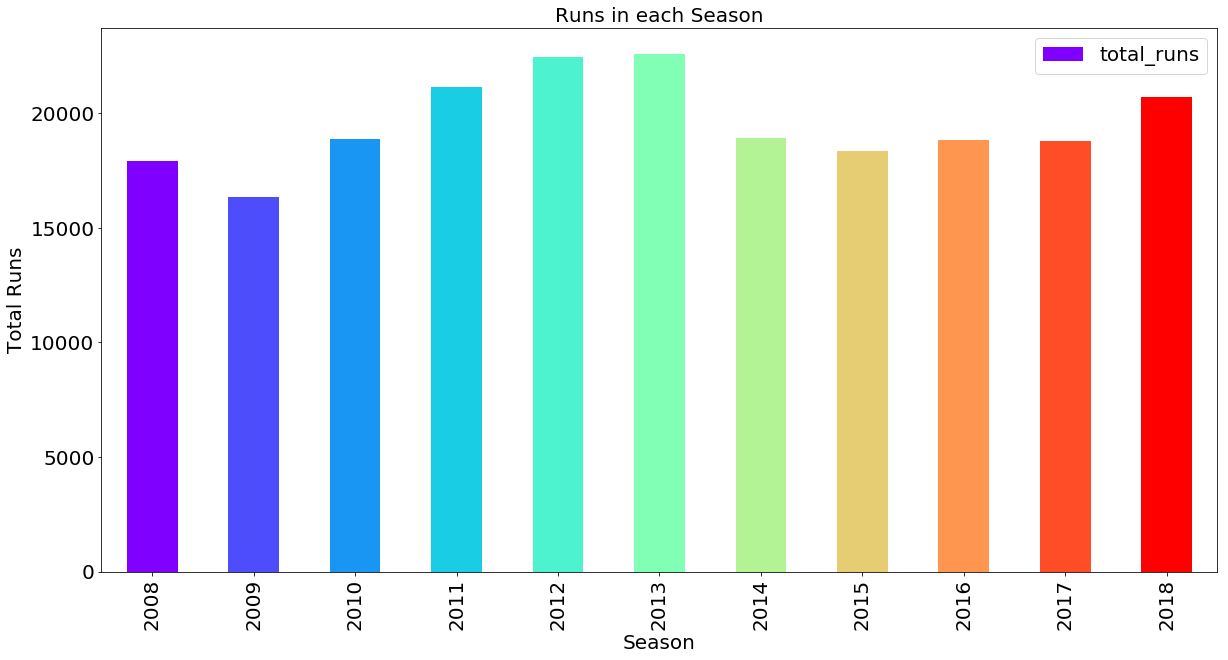

In [103]:
colors = cm.rainbow(np.linspace(0,1,11))
plt.rcParams['figure.figsize'] = [20, 10]
runs_season.plot(kind = 'bar', y = 'total_runs' , color = colors,fontsize = 20)
plt.xlabel('Season',fontsize = 20)
plt.ylabel('Total Runs',fontsize = 20)
plt.legend(loc = 'best',fontsize = 20)
plt.title('Runs in each Season',fontsize = 20)
plt.show()

We can see that 2012,2013 were seasons where more than 20000 runs were scored. I think this is because we had more number of matches in each of those seasons. To look at this lets look the the average number of runs scored in each match during all the seasons.

In [79]:
runs_season_match = pd.DataFrame(data.groupby(['season','id']).sum()['total_runs'])
runs_season_match.reset_index(inplace = True)
runs_season_match.columns =['season','id','total']
runs_season_match

,season,id,total
0,2008,60,304
1,2008,61,447
2,2008,62,261
3,2008,63,331
4,2008,64,222
5,2008,65,334
6,2008,66,285
7,2008,67,410
8,2008,68,431
9,2008,69,298


In [80]:
runs_season_match = pd.DataFrame(runs_season_match.groupby('season').agg({'id' : 'count','total' : 'sum'}))
runs_season_match



,id,total
season,,
2008,58,17937
2009,57,16353
2010,60,18883
2011,73,21154
2012,74,22453
2013,76,22602
2014,60,18931
2015,59,18353
2016,60,18862


In [81]:
runs_season_match['Match_Average'] = runs_season_match['total']/runs_season_match['id']
runs_season_match

,id,total,Match_Average
season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


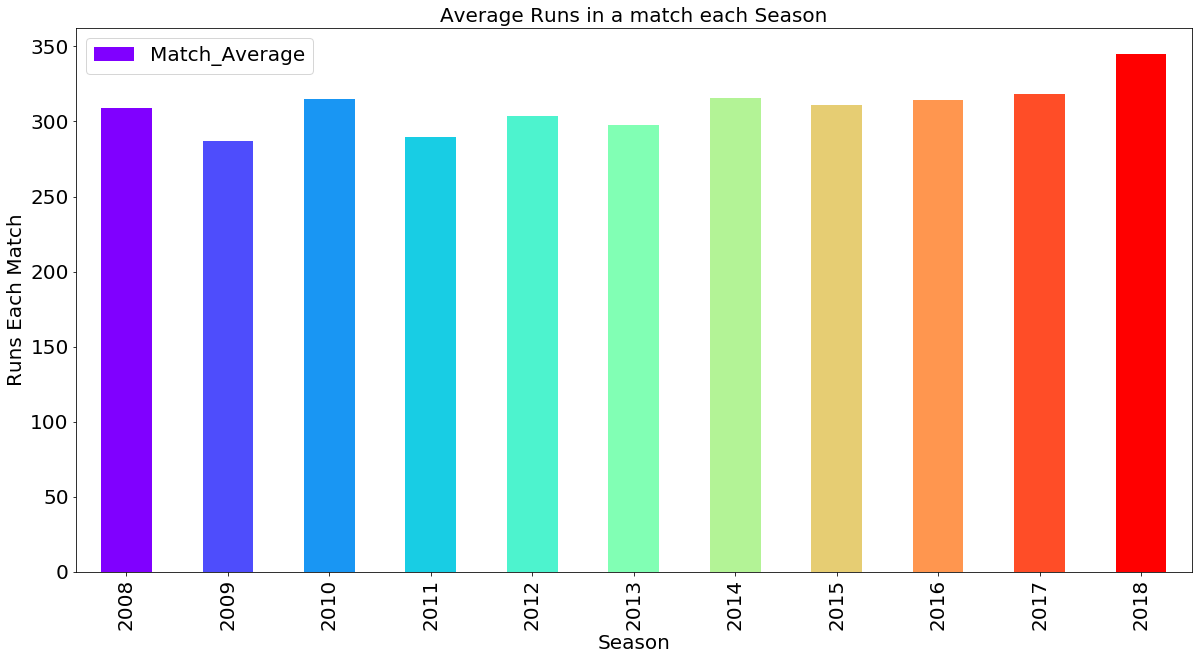

In [104]:
colors = cm.rainbow(np.linspace(0,1,11))
runs_season_match.plot(kind = 'bar',y = 'Match_Average',color = colors,fontsize = 20)
plt.xlabel('Season',fontsize = 20)
plt.ylabel('Runs Each Match',fontsize = 20)
plt.legend(loc = 'best',fontsize = 20)
plt.title('Average Runs in a match each Season',fontsize = 20)
plt.show()

This indeed shows that the hike in the season 2012,2013 was due to more number of matches. As we can see the average runs keeps on increasing and we can expect it to rise further in the next season. Though i would expect it to saturate after a couple of seasons from now on.

# Most Runs Across Season by each team

In [113]:
runs_team = pd.DataFrame(data.groupby(['season','batting_team']).sum()['total_runs'])
runs_team.reset_index(inplace = True)
runs_team = runs_team.sort_values(by = ['season','total_runs'],ascending = False)
runs_team
#Required Dataset

,season,batting_team,total_runs
84,2018,Chennai Super Kings,2920
87,2018,Kolkata Knight Riders,2863
91,2018,Sunrisers Hyderabad,2842
88,2018,Mumbai Indians,2505
89,2018,Rajasthan Royals,2443
85,2018,Delhi Daredevils,2435
90,2018,Royal Challengers Bangalore,2403
86,2018,Kings XI Punjab,2295
80,2017,Mumbai Indians,2800
79,2017,Kolkata Knight Riders,2484


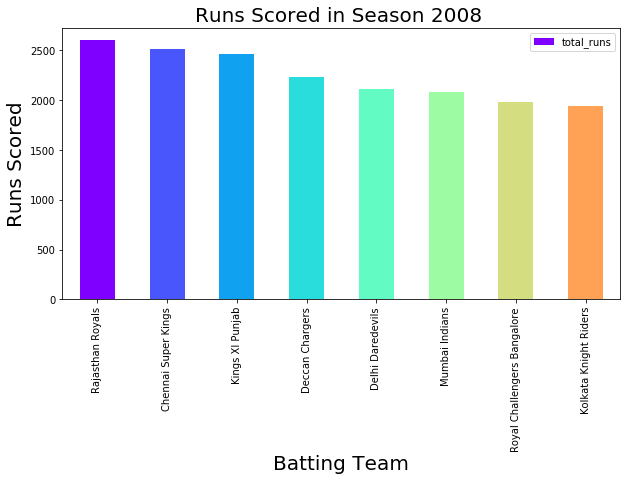

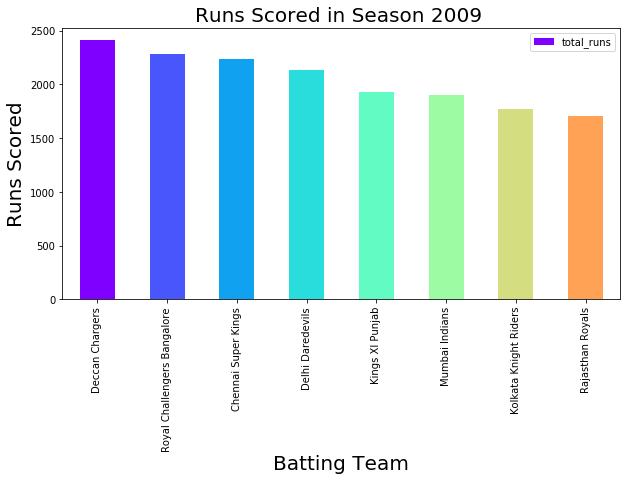

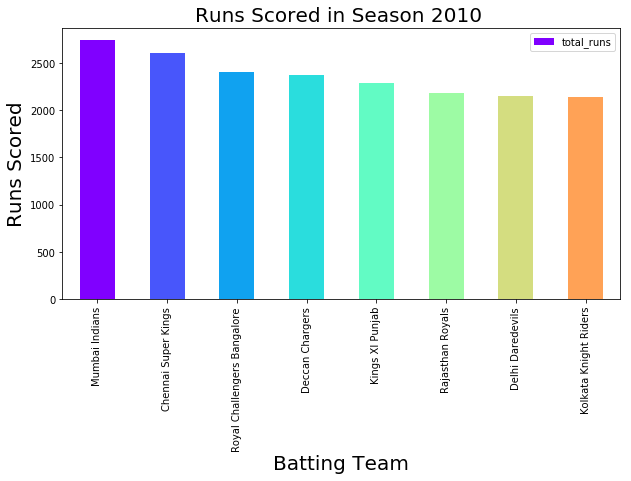

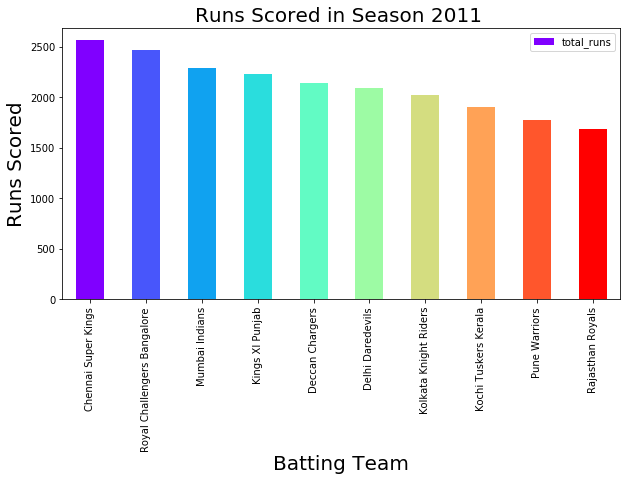

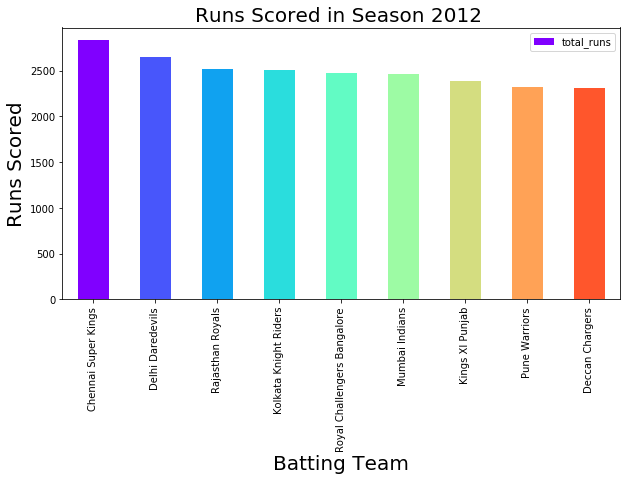

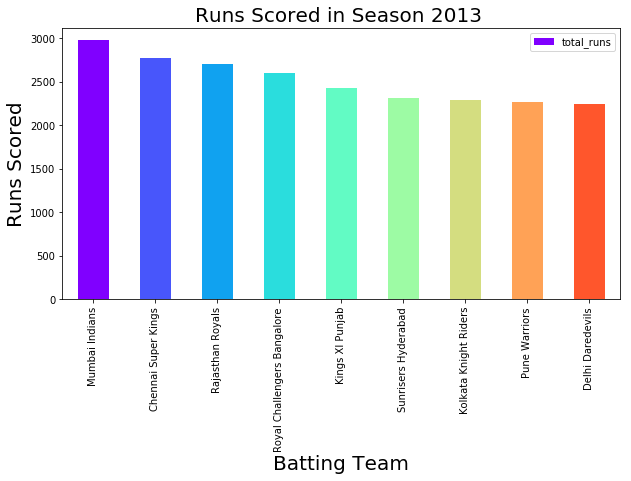

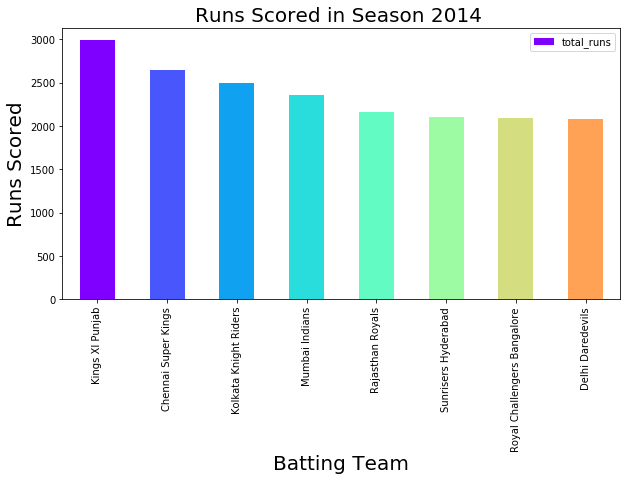

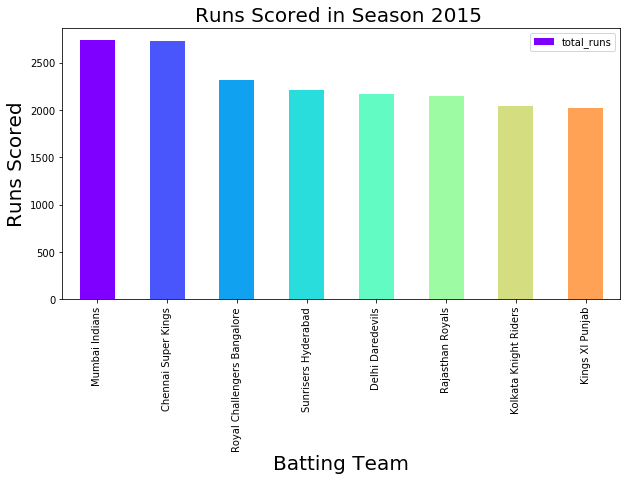

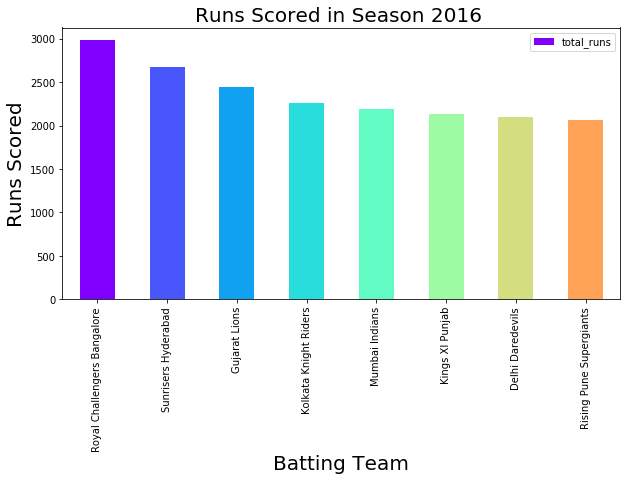

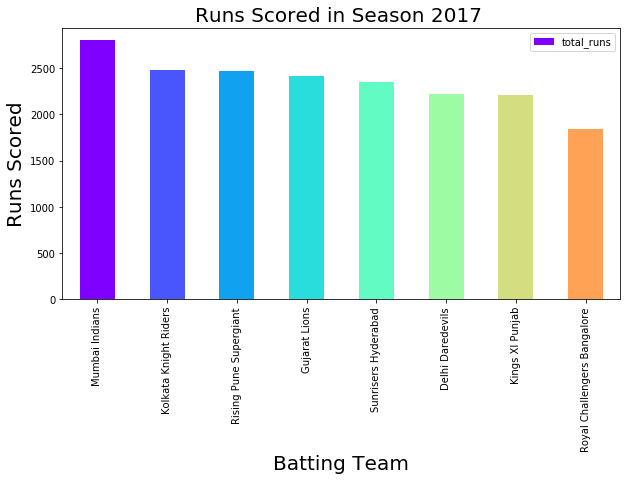

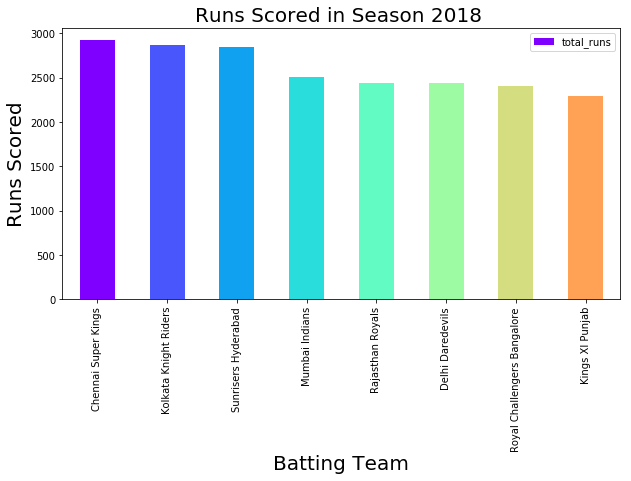

In [120]:
colors = cm.rainbow(np.linspace(0,1,10))
plt.rcParams['figure.figsize'] = [10, 5]
for title,group in runs_team.groupby('season'):
    group.plot(x = 'batting_team',y = 'total_runs',kind = 'bar',title = title,color = colors,fontsize = 10)
    plt.xlabel('Batting Team',fontsize = 20)
    plt.ylabel('Runs Scored',fontsize = 20)
    plt.title('Runs Scored in Season %s '%title,fontsize = 20)
plt.show()

This plot tells us about how each team has performed in all the years at IPL. Some teams are missing since they were not part of that particular edition of the IPL. We will not look at the average score per match since each team has played almost similar number of matches and we will not get any new insights from that.

Now we will look at the distribution of runs per match for each team.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

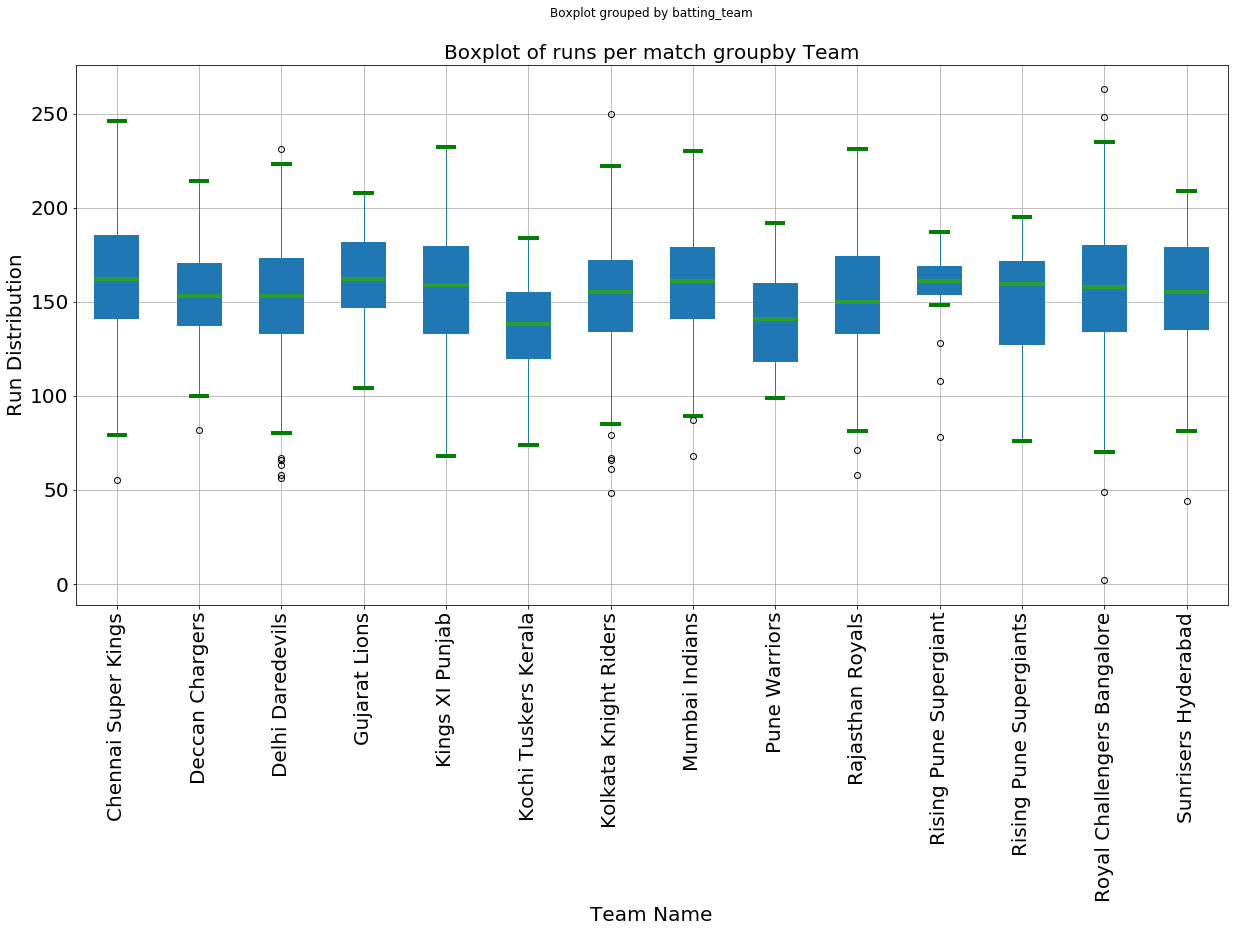

In [223]:
runs_dist_team = pd.DataFrame(data.groupby(['batting_team','id']).sum()['total_runs'])
runs_dist_team.reset_index(inplace = True)
runs_dist_team.set_index('batting_team',inplace = True)
runs_dist_team.columns

boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
capprops=dict(linestyle='-', linewidth=4,color='green')

plt.rcParams['figure.figsize'] = [20, 10]
box = runs_dist_team.boxplot(by = ['batting_team'],column = 'total_runs',fontsize = 20,boxprops = boxprops
                      ,medianprops = medianprops,capprops = capprops,patch_artist = True)
plt.xlabel('Team Name',wrap =True,fontsize = 20)
plt.ylabel('Run Distribution',fontsize = 20)
plt.title('Boxplot of runs per match groupby Team',fontsize = 20)
plt.xticks(rotation='vertical')


This plot tells us that all the team seems to have a similar median score but for some team the varaince around the mediam is high and for some team it is low. Some team will also have different variance on both side of the median. There are also times when team scored way below their average potential and hence the outliers in the plot. Team has also score more than their average score and hence the outlier on the higher side. The very low values are the reason of the match getting cancelled and hence affecting the plot.